## 1. Problem Defination

## 2. Data

For this competition, you are predicting the sale price of bulldozers sold at auctions.

> The data for this competition is split into three parts:

* Train.csv is the training set, which contains data through the end of 2011.
* Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this set throughout the majority of the competition. Your score on this set is used to create the public leaderboard.
* Test.csv is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012. Your score on the test set determines your final rank for the competition.
* The key fields are in train.csv are:

* SalesID: the uniue identifier of the sale
* MachineID: the unique identifier of a machine.  A machine can be sold multiple times
* saleprice: what the machine sold for at auction (only provided in train.csv)
* saledate: the date of the sale
* There are several fields towards the end of the file on the different options a machine can have.  The descriptions all start with "machine configuration" in the data dictionary.  Some product types do not have a particular option, so all the records for that option variable will be null for that product type.  Also, some sources do not provide good option and/or hours data.
* The machine_appendix.csv file contains the correct year manufactured for a given machine along with the make, model, and product class details. There is one machine id for every machine in all the competition datasets (training, evaluation, etc.).

## 3. Evaluation
The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted auction prices.

For more on the evaluation of this project check: https://www.kaggle.com/c/bluebook-for-bulldozers/overview/evaluation

Note: The goal for most regression evaluation metrics is to minimize the error. For example, our goal for this project will be to build a machine learning model which minimises RMSLE.

## 4. Features
Kaggle provides a data dictionary detailing all of the features of the dataset. You can view this data dictionary on Google Sheets: https://docs.google.com/spreadsheets/d/18ly-bLR8sbDJLITkWG7ozKm8l3RyieQ2Fpgix-beSYI/edit?usp=sharing` 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [2]:
# Import training and validation sets
df = pd.read_csv("TrainAndValid.csv",
                 low_memory=False)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

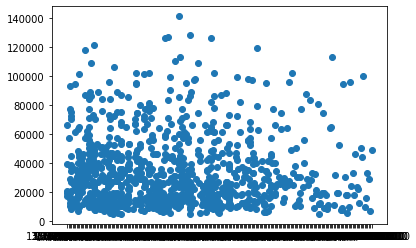

In [4]:
fig,ax = plt.subplots()
ax.scatter(df["saledate"][:1000],df["SalePrice"][:1000])

In [5]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

In [6]:
df.columns

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'saledate', 'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc',
       'fiModelSeries', 'fiModelDescriptor', 'ProductSize',
       'fiProductClassDesc', 'state', 'ProductGroup', 'ProductGroupDesc',
       'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control',
       'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension',
       'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics',
       'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size',
       'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow',
       'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb',
       'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type',
       'Travel_Controls', 'Differential_Type', 'Steering_Controls'],
      dtype='object')

In [7]:
df.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000,57000,10000,38500,11000
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3,3,3,3,3
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68,4640,2838,3486,722
UsageBand,Low,Low,High,High,Medium
saledate,11/16/2006 0:00,3/26/2004 0:00,2/26/2004 0:00,5/19/2011 0:00,7/23/2009 0:00


In [8]:
## converting saledate column in standard format

df=pd.read_csv("TrainAndValid.csv",parse_dates = ["saledate"],
              low_memory=False)

In [9]:
df.saledate[:100]

0    2006-11-16
1    2004-03-26
2    2004-02-26
3    2011-05-19
4    2009-07-23
        ...    
95   2005-12-15
96   2004-01-29
97   2008-09-18
98   2005-11-03
99   2006-06-01
Name: saledate, Length: 100, dtype: datetime64[ns]

In [10]:
## Sorting sale date in ascending order

df.sort_values(by=["saledate"],inplace=True,ascending=True)

In [11]:
df.saledate[:100]

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
            ...    
113454   1989-01-31
62665    1989-01-31
78445    1989-01-31
233279   1989-02-01
28223    1989-02-01
Name: saledate, Length: 100, dtype: datetime64[ns]

In [12]:
## making a copy of this data dataframe

df_tmp = df.copy()
df_tmp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500,14000,50000,16000,22000
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18,99,99,99,99
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


In [13]:
## FEATURE ENGINEERING

df_tmp["sale year"] = df_tmp.saledate.dt.year
df_tmp["sale month"] = df_tmp.saledate.dt.month
df_tmp["sale day"] = df_tmp.saledate.dt.day
df_tmp.drop("saledate",axis=1,inplace=True)

In [14]:
# Getting Data Ready
df_tmp.isna().sum()
# len(df_tmp)

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension             386715
Blade_Width         

## 1. we need to convert all data in numerical form 

Task 01: Find all columns that have data in string format and change it to category dtype

In [15]:
for clm_name,clm_values in df_tmp.items():
    if pd.api.types.is_string_dtype(clm_values):
        df_tmp[clm_name] = clm_values.astype("category").cat.as_ordered()

In [16]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 55 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor       

In [17]:
df_tmp.state.cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

In [18]:
df_tmp.state.cat.codes

205615    43
274835     8
141296     8
212552     8
62755      8
          ..
410879     4
412476     4
411927     4
407124     4
409203     4
Length: 412698, dtype: int8

## 2. Managing the Missing Values

In [19]:
df_tmp.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension             386715
Blade_Width         

## Fill numerical missing values

Finding numerical columns

In [20]:
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
sale year
sale month
sale day


Which of these columns have null values?

In [21]:
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

auctioneerID
MachineHoursCurrentMeter


Now, we need to fill these missing values with median and mark that these values were filled up by adding a binary column 

In [22]:
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            df_tmp[label+"_is_misiing"] = pd.isnull(content)
            df_tmp[label] = content.fillna(content.median())

In [23]:
df_tmp.auctioneerID_is_misiing.value_counts()

False    392562
True      20136
Name: auctioneerID_is_misiing, dtype: int64

## Now, lets fill missing categorical data

Check columns that are not numeric..

In [24]:
df_tmp.state

205615         Texas
274835       Florida
141296       Florida
212552       Florida
62755        Florida
             ...    
410879    California
412476    California
411927    California
407124    California
409203    California
Name: state, Length: 412698, dtype: category
Categories (53, object): [Alabama < Alaska < Arizona < Arkansas ... Washington DC < West Virginia < Wisconsin < Wyoming]

In [25]:
for label,content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


These are all non numeric colums

In [26]:
for label,content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        df_tmp[label+"_is_missing"] = pd.isnull(content)
        
        df_tmp[label] = pd.Categorical(content).codes + 1

In [27]:
df_tmp.isna().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 101, dtype: int64

In [28]:
# from sklearn.ensemble import RndomForestRegressor
# %%time
# model = RandomForestRegressor(n_jobs=-1,
#                              random_state = 42)

# model.fit(df_tmp.drop("saleprice",axis=1),df_tmp["saleprice"])

## Splitting the data in train and valid set

* Training set = everything expect sales in 2012
* Test set = sales in 2012

In [29]:
train = df_tmp[df_tmp["sale year"] != 2012]
valid = df_tmp[df_tmp["sale year"] == 2012]
len(train),len(valid)

(401125, 11573)

Defining labels and features in our training and test set

In [30]:
X_train, y_train = train.drop("SalePrice",axis=1), train.SalePrice
X_valid, y_valid = valid.drop("SalePrice", axis=1), valid.SalePrice

In [43]:
from sklearn.metrics import mean_squared_log_error, mean_absolute_error,r2_score

def rmsle(y_test,y_preds):
    return np.sqrt(mean_squared_log_error(y_test,y_preds))

def scores(model):
    y_train_preds = model.predict(X_train)
    y_valid_preds = model.predict(X_valid)
    
    scores = { "Training MAE" : mean_absolute_error(y_train,y_train_preds),
               "Valid MAE" : mean_absolute_error(y_valid,y_valid_preds),
               "Training RMSLE" : rmsle(y_train,y_train_preds),
               "Valid RSMLE" : rmsle(y_valid,y_valid_preds),                       
               "Training R2" : r2_score(y_train,y_train_preds),
             "Valid R2" : r2_score(y_valid,y_valid_preds) }
    return scores
           

In [44]:
%%time
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_jobs=-1,
                             random_state = 42,
                             max_samples=10000)

model.fit(X_train,y_train)

Wall time: 15.2 s


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=10000, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [45]:
scores(model)

{'Training MAE': 5530.530904705516,
 'Valid MAE': 7090.753389786572,
 'Training RMSLE': 0.25647273079766847,
 'Valid RSMLE': 0.2895513455735602,
 'Training R2': 0.8620882220528066,
 'Valid R2': 0.8346268881678072}

## HyperParameter tuning

> Randomized Search 

In [51]:
%%time

from sklearn.model_selection import RandomizedSearchCV

rf_grid = { "n_estimators" : np.arange(10,100,10),
            "max_depth" : [None,3,5,10],
            "min_samples_split" : np.arange(2,10,2),
            "min_samples_leaf" : np.arange(1,20,2),
            "max_features" : [0.5,1,"sqrt","auto"],
           "max_samples" : [10000]}

rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs = -1,
                                                   random_state = 42),
                                                   param_distributions = rf_grid,
                                                   n_iter = 2,
                                                   cv=5,
                                                   verbose=True)
rs_model.fit(X_train,y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  1.2min finished


Wall time: 1min 20s


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100, n_jobs=-1,
                   

## using n_iter =100
We can find the best params
Right now best params are:

In [53]:
rs_model.best_params_

{'n_estimators': 20,
 'min_samples_split': 2,
 'min_samples_leaf': 9,
 'max_samples': 10000,
 'max_features': 0.5,
 'max_depth': None}

In [55]:
%%time

ideal_model = RandomForestRegressor(n_estimators = 40,
                                   min_samples_leaf=1,
                                   min_samples_split=14,
                                   max_features=0.5,
                                   n_jobs=-1,
                                   max_samples=None,
                                    random_state = 42)

ideal_model.fit(X_train,y_train)

Wall time: 1min 18s


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=0.5, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=14, min_weight_fraction_leaf=0.0,
                      n_estimators=40, n_jobs=-1, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [57]:
#Trained on all the data
scores(ideal_model)

{'Training MAE': 3013.8068096422594,
 'Valid MAE': 5901.746777795443,
 'Training RMSLE': 0.1468906708294255,
 'Valid RSMLE': 0.2424206500857239,
 'Training R2': 0.9573135828174776,
 'Valid R2': 0.8828660495187726}

In [58]:
#trained on 10000 samples
scores(rs_model)

{'Training MAE': 6393.039669771323,
 'Valid MAE': 7760.88698107824,
 'Training RMSLE': 0.287561603856724,
 'Valid RSMLE': 0.3118044176402155,
 'Training R2': 0.8186066395933556,
 'Valid R2': 0.8020749508496088}

In [82]:
# Import the test data
df_test = pd.read_csv("Test.csv",parse_dates = ["saledate"],
              low_memory=False)

In [83]:
# formatting test data

def processing_data(df):
    
    df["sale year"] = df.saledate.dt.year
    df["sale month"] = df.saledate.dt.month
    df["sale day"] = df.saledate.dt.day
    
    df.drop("saledate",axis=1,inplace=True)
    
    # fillling missing numerical data
    
    for label,content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                
                df[label+"_is_missing"] = pd.isnull(content)
                
                df[label] = content.fillna(content.median())
                
    # filling up missing categorical data
    for label,content in df.items():
        if not pd.api.types.is_numeric_dtype(content):
            
            df[label+"_is_missing"] = pd.isnull(content)
            
            df[label] = pd.Categorical(content).codes +1
            
    return df


In [84]:
# formatted test dataset

df_test = processing_data(df_test)

In [85]:
df_test["auctioneerID_is_missing"] = False
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing,auctioneerID_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,False
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,False,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,True,True,True,True,True,False
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,True,True,True,True,True,False
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,False,False,False,True,True,False


In [86]:
df_tmp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
205615,1646770,9500.0,1126363,8434,132,18.0,1974,0.0,0,4593,...,True,True,True,True,True,False,False,False,True,True
274835,1821514,14000.0,1194089,10150,132,99.0,1980,0.0,0,1820,...,True,True,True,True,True,True,True,True,False,False
141296,1505138,50000.0,1473654,4139,132,99.0,1978,0.0,0,2348,...,True,True,True,True,True,False,False,False,True,True
212552,1671174,16000.0,1327630,8591,132,99.0,1980,0.0,0,1819,...,True,True,True,True,True,True,True,True,False,False
62755,1329056,22000.0,1336053,4089,132,99.0,1984,0.0,0,2119,...,True,True,True,True,True,False,False,False,True,True


In [89]:
# now the shape of our test set and train set is same the only extra column in train dataset is 
# Saleprice that we have to predict
test_preds = ideal_model.predict(df_test)

In [93]:
## Format pridiction in desired format for kaggle
df_preds = pd.DataFrame()
df_preds["SalesID"] = df_test["SalesID"]
df_preds["SalesPrice"] = test_preds
df_preds

,SalesID,SalesPrice
0,1227829,17208.535151
1,1227844,19301.175885
2,1227847,49035.263546
3,1227848,62305.283936
4,1227863,46497.600407
...,...,...
12452,6643171,43457.403561
12453,6643173,14596.367774
12454,6643184,17473.259089
12455,6643186,17859.844850


In [97]:
df_preds.to_csv("bulldozer_price_pridicted.csv",index=False)

## Feature Importance

In [98]:
ideal_model.feature_importances_

array([3.57333485e-02, 2.16689328e-02, 4.27214987e-02, 1.78159720e-03,
       3.77043162e-03, 1.95125578e-01, 3.31369191e-03, 1.13888289e-03,
       4.69949438e-02, 4.79965600e-02, 5.98891176e-02, 4.74887270e-03,
       1.82196412e-02, 1.56910561e-01, 4.28130801e-02, 6.74625111e-03,
       3.20072314e-03, 1.68495330e-03, 3.08561316e-03, 7.69102546e-02,
       4.07840122e-04, 6.74959368e-05, 8.33586335e-04, 2.44876160e-03,
       1.25863843e-03, 3.07990594e-05, 2.60358036e-04, 3.55038044e-03,
       2.27646227e-03, 1.60286635e-04, 5.53122272e-03, 1.98211662e-03,
       6.40532624e-03, 9.35184721e-04, 2.23932867e-03, 1.11761821e-02,
       1.02832360e-03, 1.01233345e-02, 2.79488853e-03, 2.30455302e-03,
       8.99464303e-04, 9.15154262e-04, 3.17279311e-03, 6.53441797e-04,
       5.43011184e-04, 3.92994514e-04, 5.89732918e-04, 2.26122633e-03,
       1.28005291e-03, 2.71950034e-04, 1.64445441e-04, 7.47730826e-02,
       7.91593000e-03, 6.48558025e-03, 2.86474921e-04, 1.60280560e-03,
      

In [102]:
# Plotting feature importance
def feature_imp(columns,importance,n=20):
    df = (pd.DataFrame({"features": columns,
                        "feature_importances" : importance})
          .sort_values("feature_importances",ascending=False)
          .reset_index(drop=True)
         )
    fig,ax = plt.subplots(figsize=(10,10))
    
    ax.barh(df["features"][:n],df["feature_importances"][:20])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature Importance")
    ax.invert_yaxis()

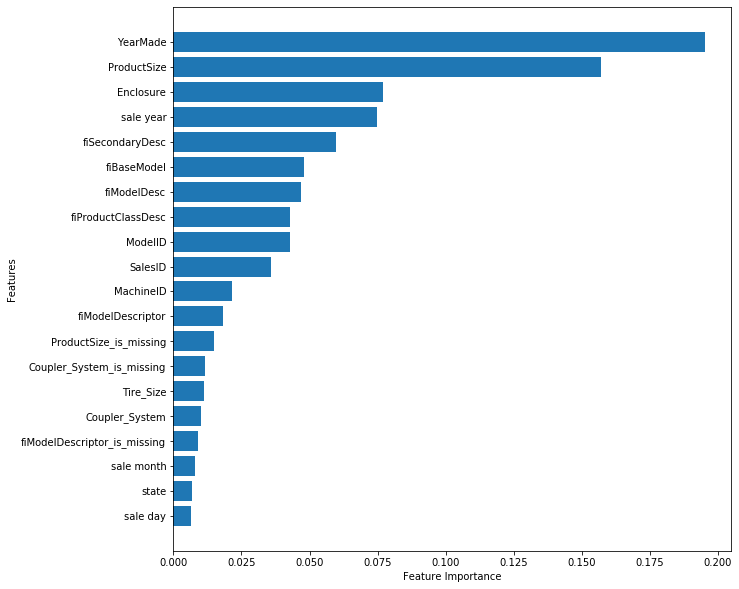

In [103]:
feature_imp(X_train.columns,ideal_model.feature_importances_)